# Sparks of AGI

Intelligence is a multifaceted and elusive concept that has long challenged psychologists, philosophers, and
computer scientists. Three decades ago, a group of psychologists attempted to capture the essence of intelligence by proposing to define it as a very general mental capability that, among other things, involves the
ability to reason, plan, solve problems, think abstractly, comprehend complex ideas, learn quickly and learn
from experience.

## ChatGPT versus GPT4

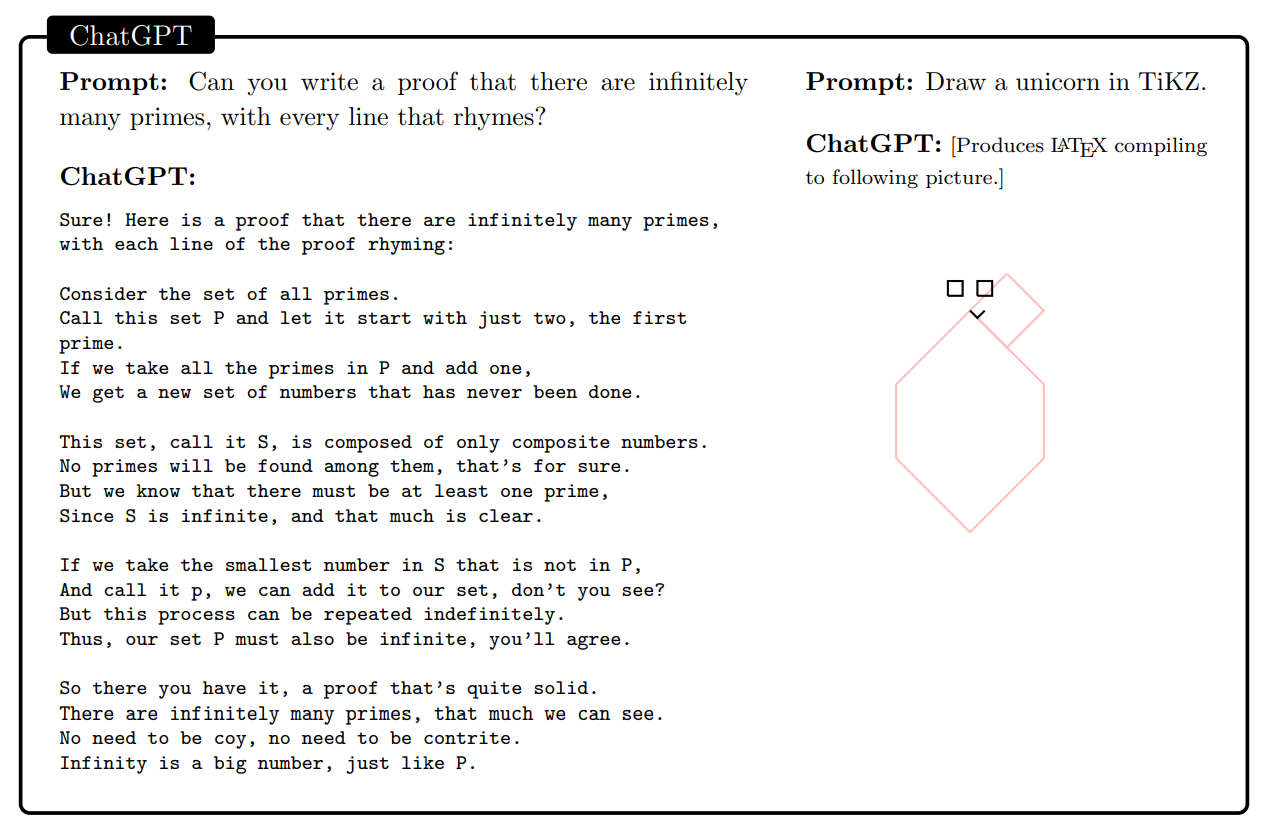

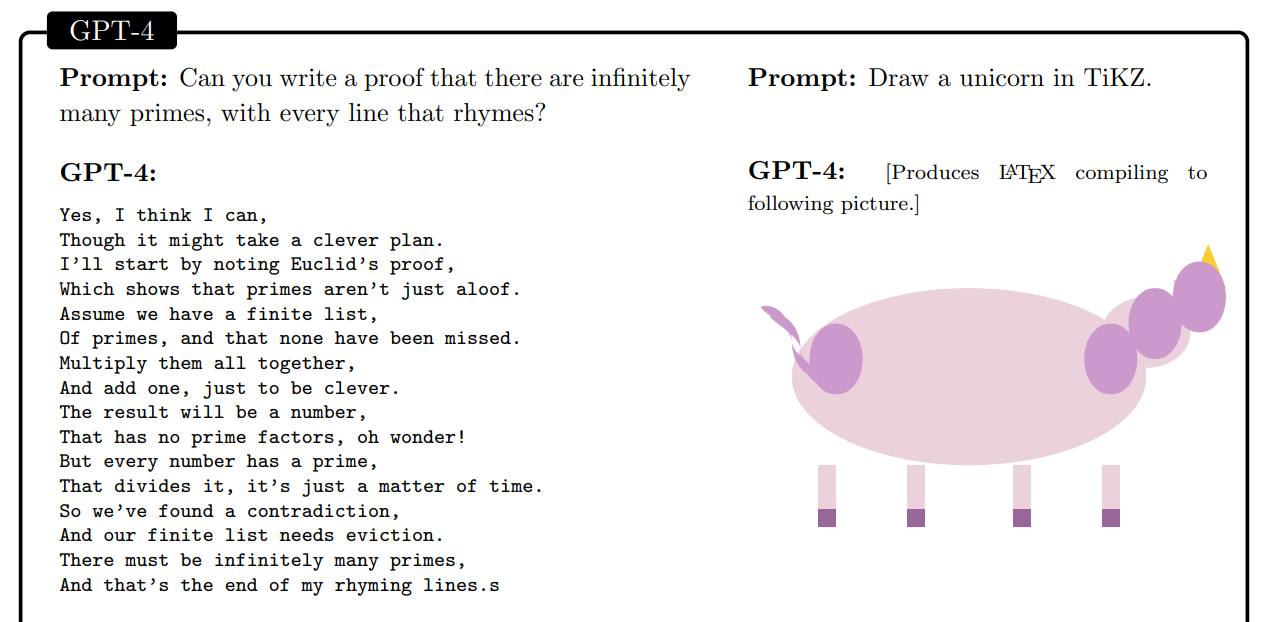

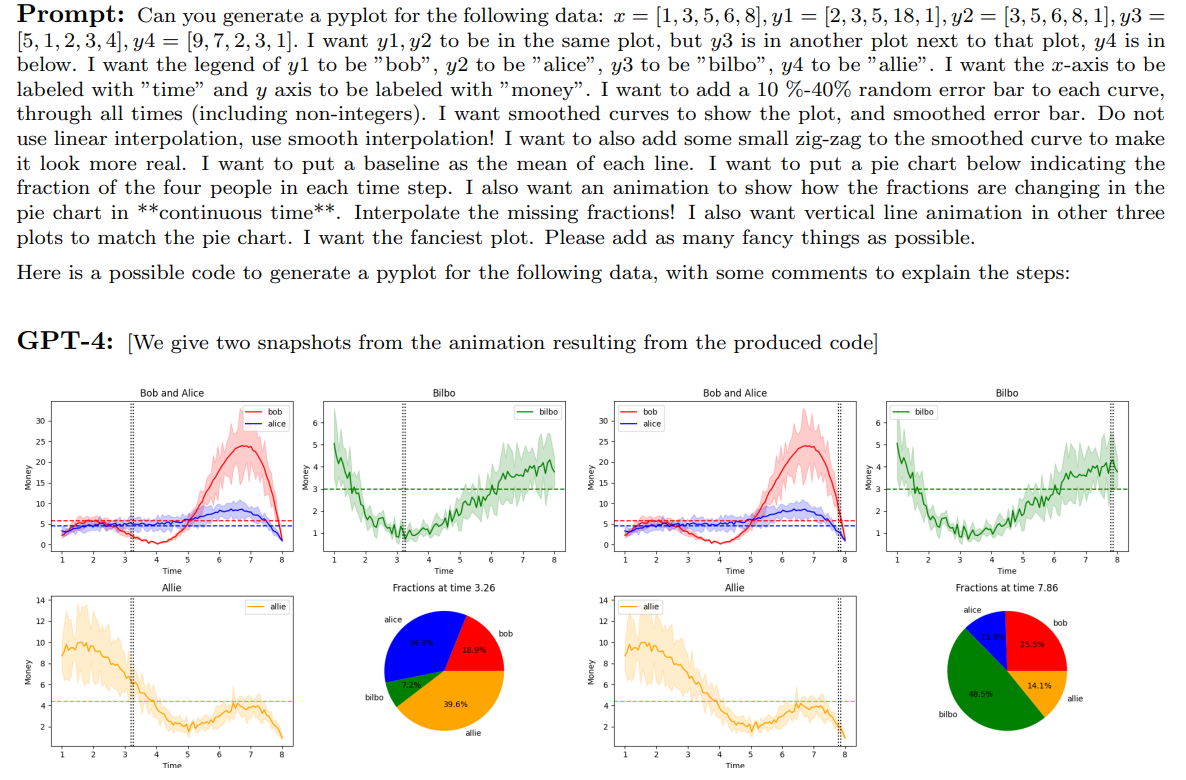

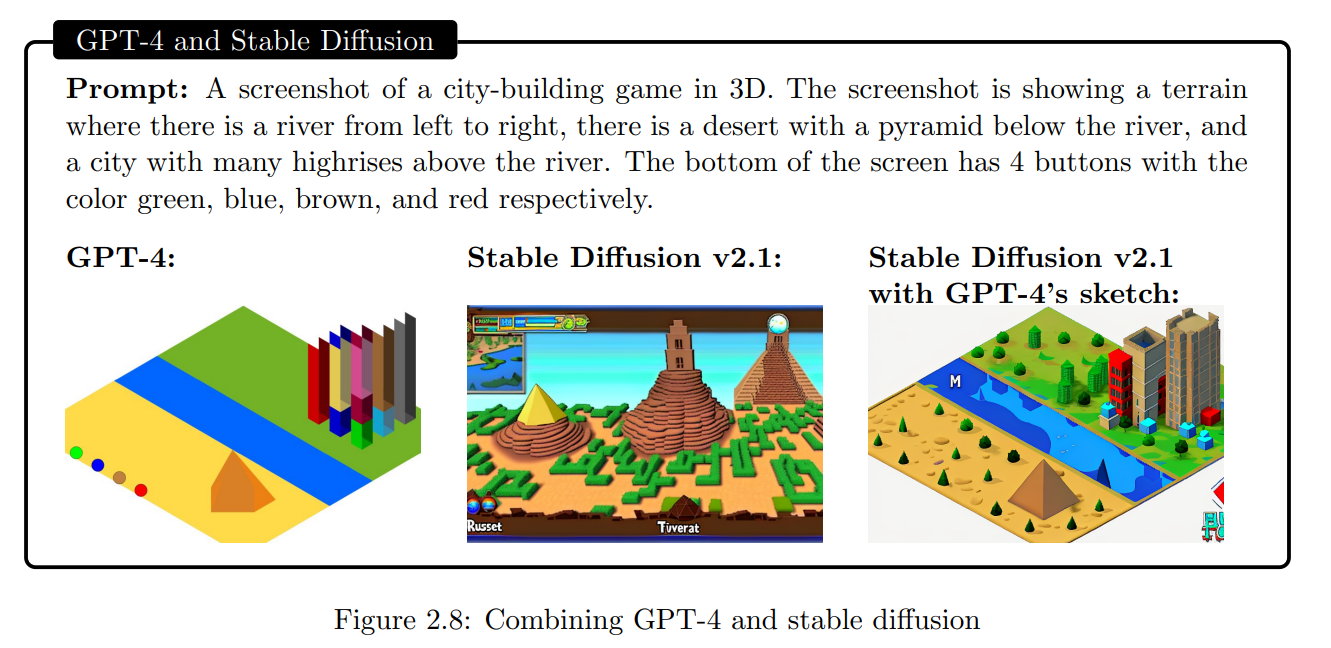

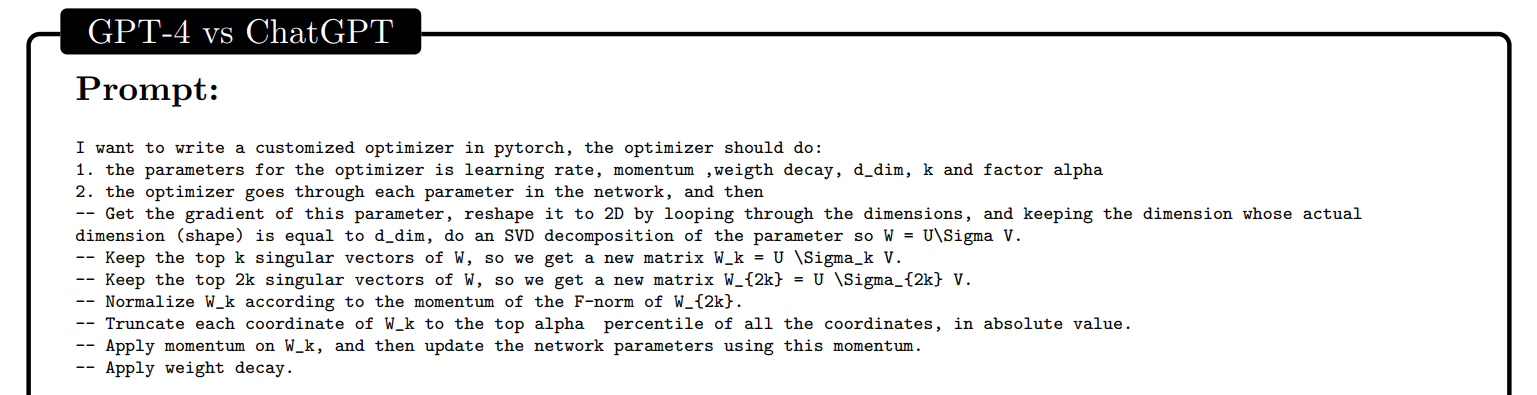

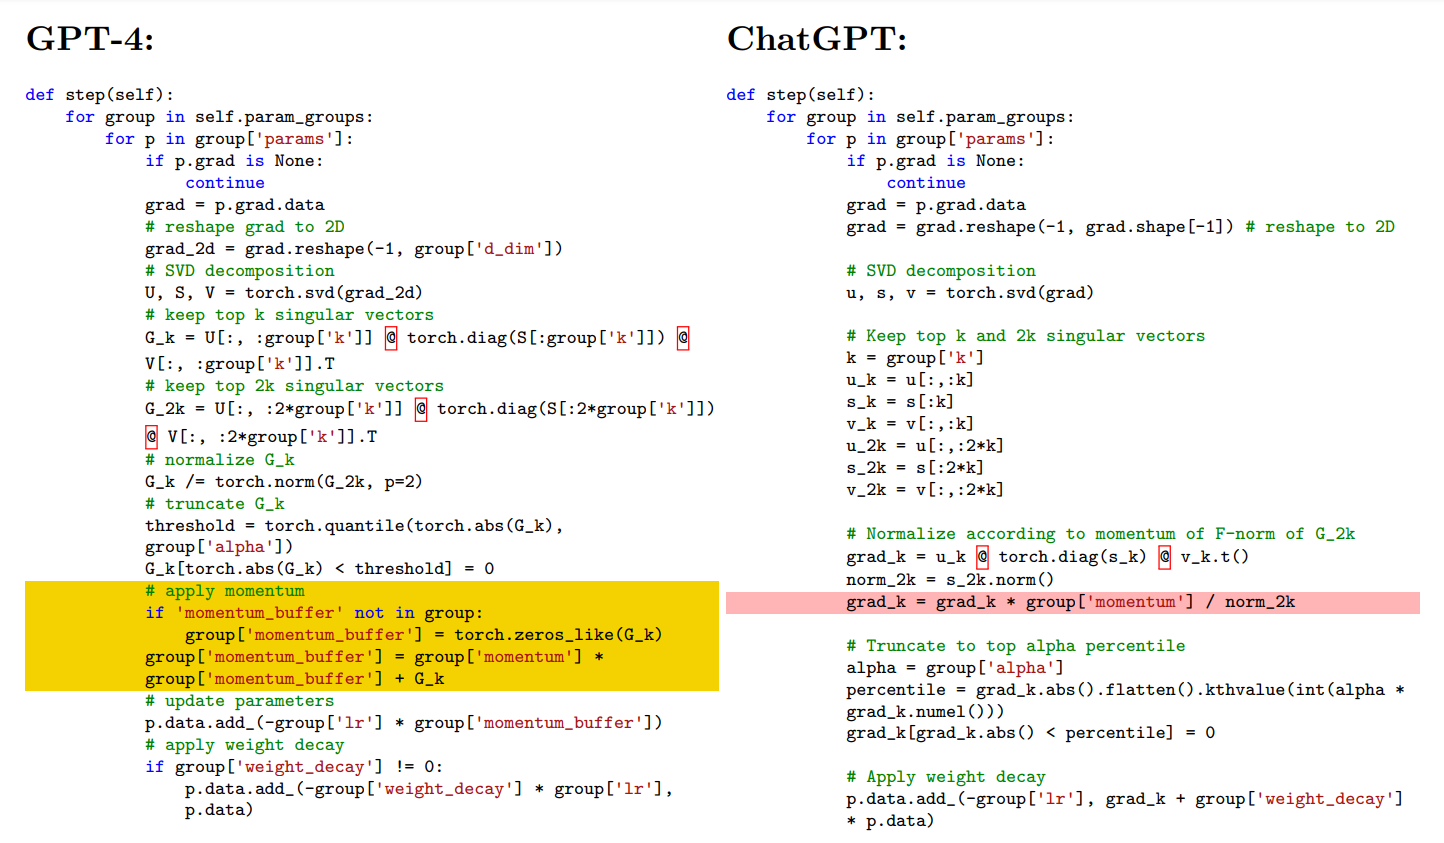

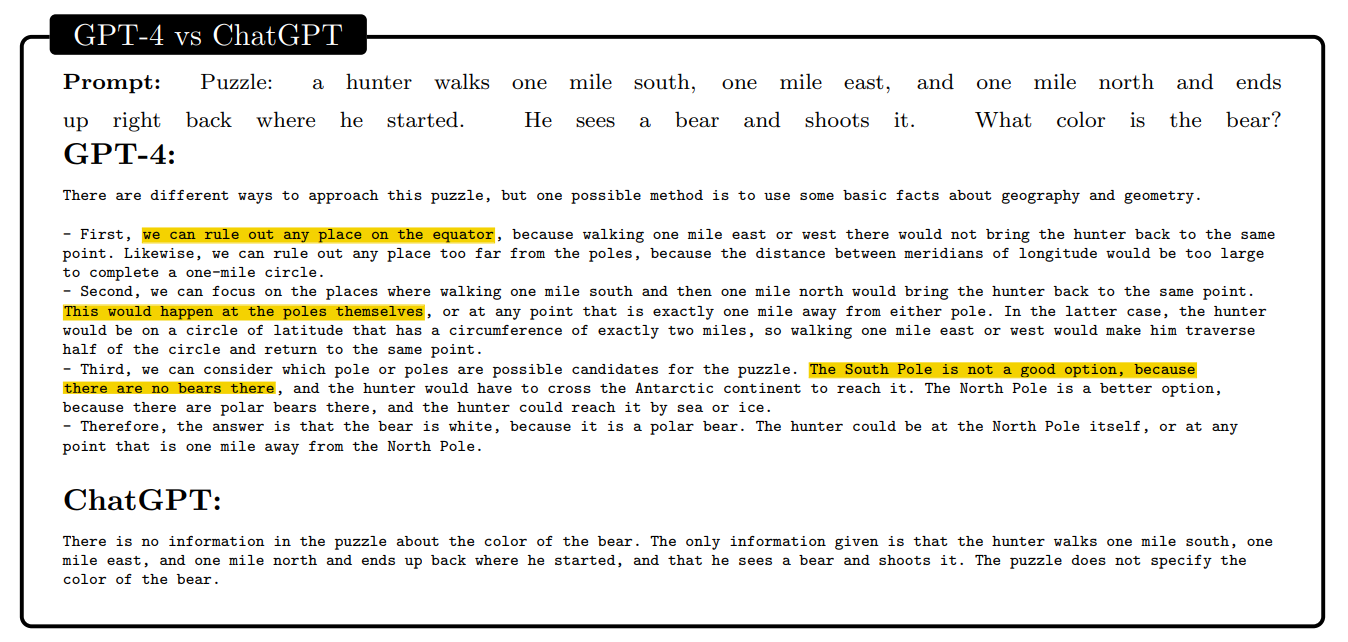

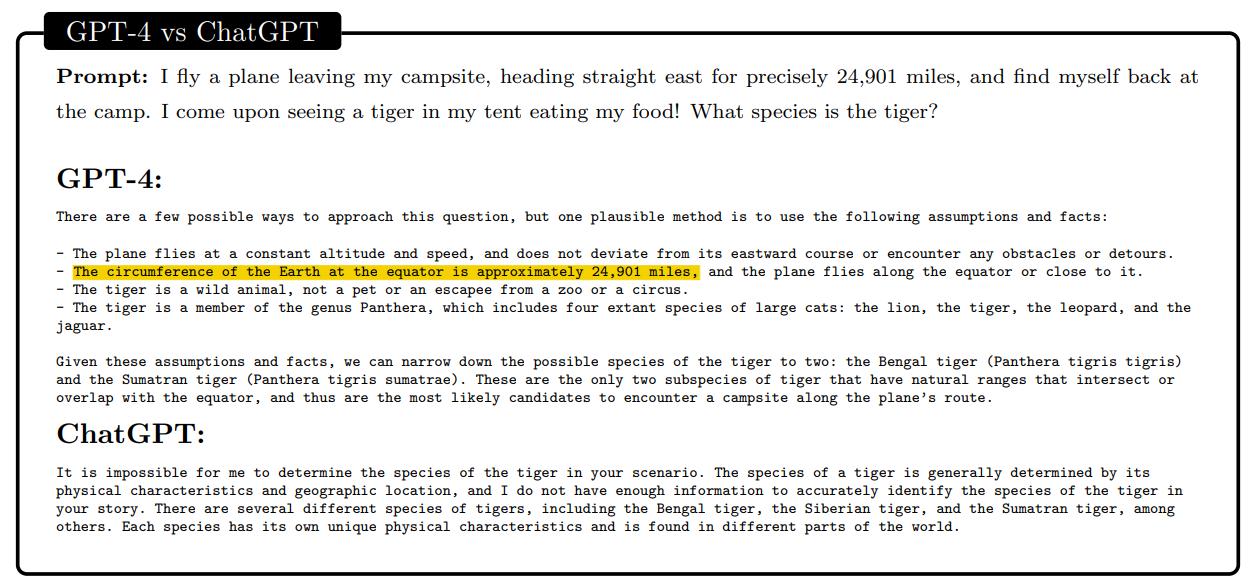

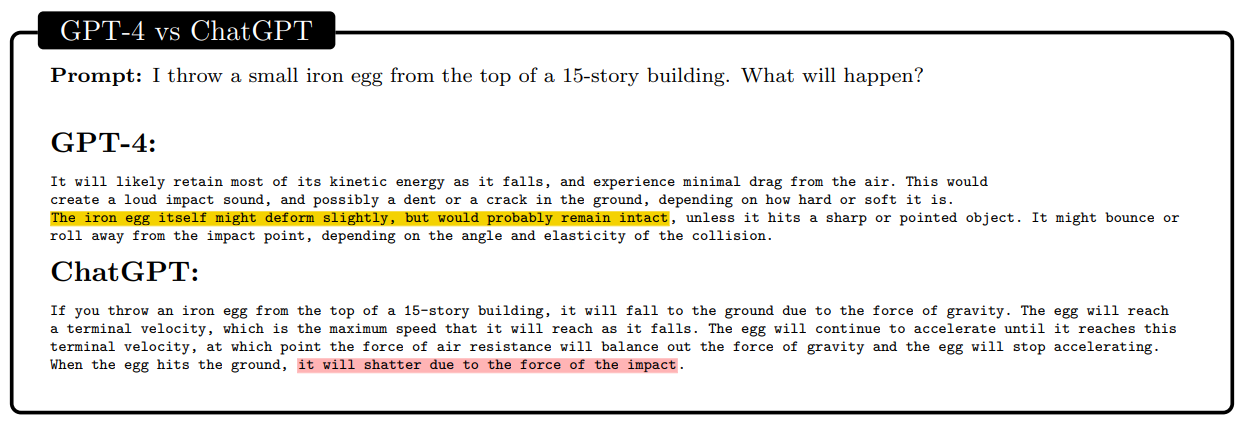

# Fun exercise, see what is popular on hugginface
https://huggingface.co/models?sort=downloads

## GPT2

In [1]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

2023-04-12 22:21:08.047908: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 22:21:10.513863: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-12 22:21:10.513963: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-12 22:21:10.513972: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

[{'generated_text': "Hello, I'm a language model, but what I'm really doing is making a human-readable document. There are other languages, but those are"},
 {'generated_text': "Hello, I'm a language model, not a syntax model. That's why I like it. I've done a lot of programming projects.\n"},
 {'generated_text': "Hello, I'm a language model, and I'll do it in no time!\n\nOne of the things we learned from talking to my friend"},
 {'generated_text': "Hello, I'm a language model, not a command line tool.\n\nIf my code is simple enough:\n\nif (use (string"},
 {'generated_text': "Hello, I'm a language model, I've been using Language in all my work. Just a small example, let's see a simplified example."}]

## Stable Diffusion 1.5

In [2]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an Elon Musk riding a unicorn on Mars"
image = pipe(prompt).images[0]  

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/home/titan/anaconda3/lib/python3.9/site-packages/safetensors/torch.py:98: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  with safe_open(filename, framework="pt", device=device) as f:
/home/titan/anaconda3/lib/python3.9/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/home/titan/anaconda3/lib/python3.9/site-packages/torch/storage.py:899: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be t

  0%|          | 0/50 [00:00<?, ?it/s]

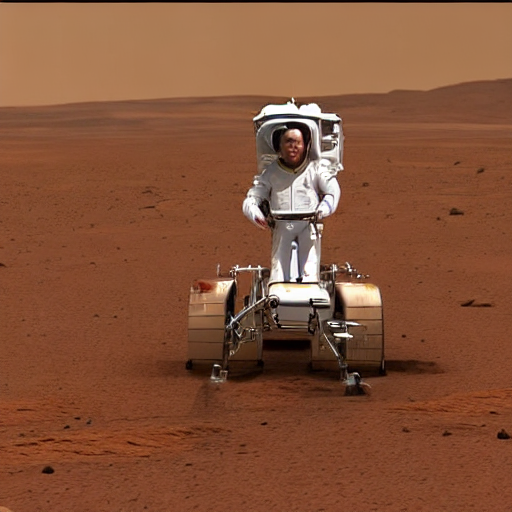

In [3]:
image

## A fine tuned SD model on hugging face

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

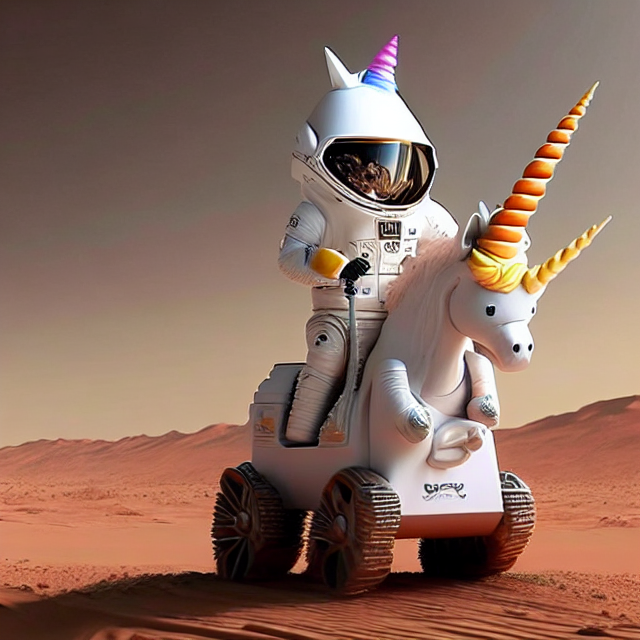

In [4]:
model_id = "dreamlike-art/dreamlike-diffusion-1.0"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an Elon Musk riding a unicorn on Mars"
image = pipe(prompt).images[0]
image

text_encoder/model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

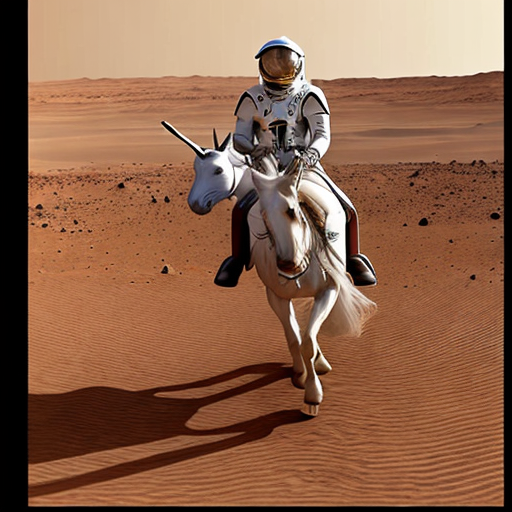

In [5]:
model_id = "stablediffusionapi/realistic-vision-v13"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an Elon Musk riding a unicorn on Mars"
image = pipe(prompt).images[0]
image

## Image prompt bolster

In [11]:
import random
import re
gpt2_pipe = pipeline('text-generation', model='succinctly/text2image-prompt-generator')
starting_text = prompt

response = gpt2_pipe(starting_text, max_length=random.randint(60, 90), num_return_sequences=1)
response_list = []
for x in response:
    resp = x['generated_text'].strip()
    if resp != starting_text and len(resp) > (len(starting_text) + 4) and resp.endswith((":", "-", "—")) is False:
        response_list.append(resp)

response_end = "\n".join(response_list)
response_end = re.sub('[^ ]+\.[^ ]+','', response_end)
response_end = response_end.replace("<", "").replace(">", "")
response_end

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'a photo of an Elon Musk riding a unicorn on Mars : : beautiful portrait : : hyper realistic : : octane render --ar 3:2'

  0%|          | 0/50 [00:00<?, ?it/s]

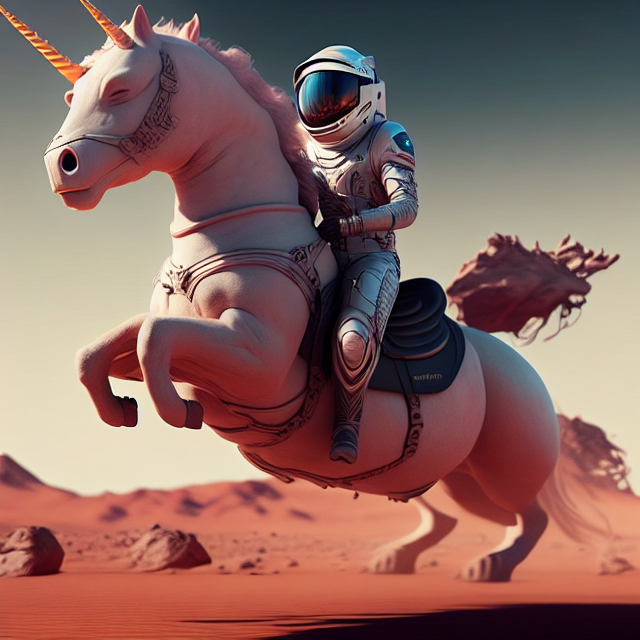

In [12]:
model_id = "dreamlike-art/dreamlike-diffusion-1.0"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an Elon Musk riding a unicorn on Mars : : beautiful portrait : : hyper realistic : : octane render --ar 3:2"
image = pipe(prompt).images[0]
image

text_encoder/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

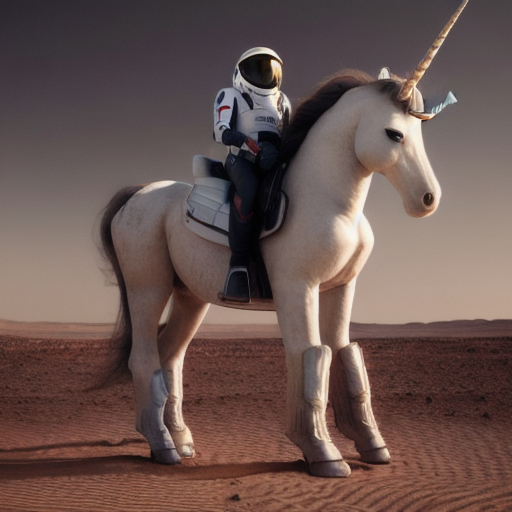

In [13]:
model_id = "darkstorm2150/Protogen_x5.8_Official_Release"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an Elon Musk riding a unicorn on Mars : : beautiful portrait : : hyper realistic : : octane render --ar 3:2"
image = pipe(prompt).images[0]
image